### Import modules and read simulation data

In [1]:
from contrast.box import tpcf_r, projected_tpcf_r, tpcf_rmu, mean_radial_velocity_r
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from astropy.io import fits
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'
rc('text', usetex=True)

In [2]:
with fits.open('data/mock_data.fits') as hdul:
    data = hdul[1].data
    
x = data['X']
y = data['Y']
z = data['Z']
vx = data['VX']
vy = data['VY']
vz = data['VZ']

positions = np.c_[x, y, z]
velocities = np.c_[vx, vy, vz]

box_size = 1500

### Compute the monopole correlation function in 3D

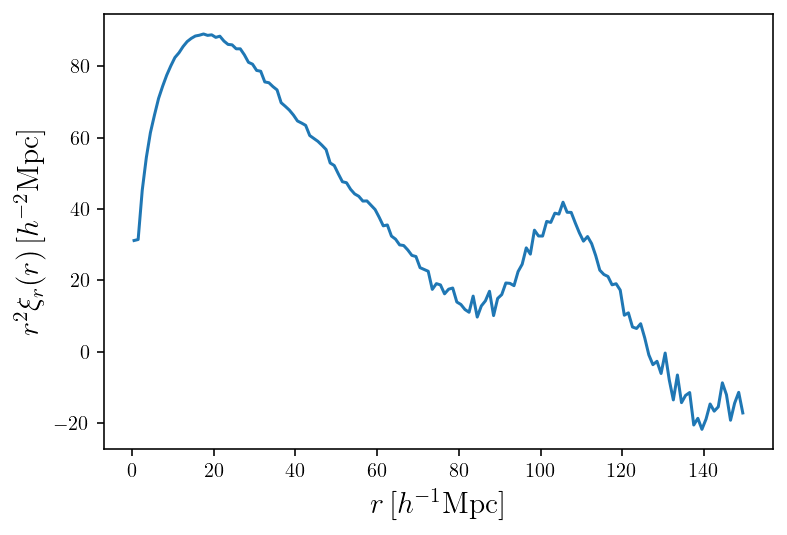

CPU times: user 7min 49s, sys: 3.24 s, total: 7min 53s
Wall time: 2min 15s


In [3]:
%%time
rbins = np.linspace(0, 150, 151)
rbins_c = 0.5*(rbins[1:] + rbins[:-1])

xi_r = tpcf_r(positions1=positions, box_size=box_size, rbins=rbins, nthreads=4)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(rbins_c, rbins_c ** 2 * xi_r)
ax.set_xlabel(r'$r\,[h^{-1}{\rm Mpc}]$', fontsize=15)
ax.set_ylabel(r'$r^2\xi_r(r)\,[h^{-2}{\rm Mpc}]$', fontsize=15)

plt.show()

### Compute the projected correlation function in the x-y plane

In [ ]:
%%time
rbins = np.linspace(0, 15, 16)
rbins_c = 0.5*(rbins[1:] + rbins[:-1])

sigma_r = projected_tpcf_r(positions1=positions[:, :2], box_size=box_size, rbins=rbins, nthreads=4)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(rbins_c, sigma_r)
ax.set_xlabel(r'$r\,[h^{-1}{\rm Mpc}]$', fontsize=15)
ax.set_ylabel(r'$\Sigma_r(r)$', fontsize=15)

plt.show()

### Compute the mean radial pairwise velocity as a function of r

[-2.32759462e+07 -9.20604732e+07 -1.34720556e+08 -1.56767972e+08
 -1.81754593e+08 -2.04877663e+08 -2.30171791e+08 -2.59714941e+08
 -2.87138083e+08 -3.18205969e+08 -3.48907144e+08 -3.79670649e+08
 -4.12677148e+08 -4.46425778e+08 -4.79489500e+08 -5.14624376e+08
 -5.45969649e+08 -5.79358052e+08 -6.15128322e+08 -6.48558513e+08
 -6.82351834e+08 -7.18429112e+08 -7.52970048e+08 -7.84946829e+08
 -8.23293276e+08 -8.55949744e+08 -8.92084812e+08 -9.23420275e+08
 -9.55550282e+08 -9.91848668e+08 -1.02054836e+09 -1.05338363e+09
 -1.08465912e+09 -1.11706101e+09 -1.14286616e+09 -1.17855940e+09
 -1.20186735e+09 -1.23384390e+09 -1.26787175e+09 -1.29194223e+09]


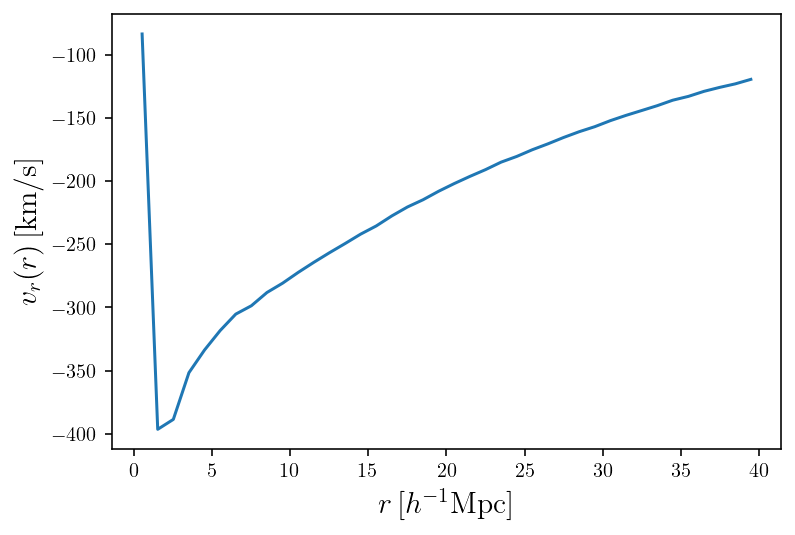

CPU times: user 43.6 s, sys: 1.7 s, total: 45.3 s
Wall time: 14 s


In [5]:
%%time

rbins = np.linspace(0, 40, 41)
rbins_c = 0.5*(rbins[1:] + rbins[:-1])

v_r = mean_radial_velocity_r(positions1=positions, velocities1=velocities,
    box_size=box_size, rbins=rbins, nthreads=4)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(rbins_c, v_r)
ax.set_xlabel(r'$r\,[h^{-1}{\rm Mpc}]$', fontsize=15)
ax.set_ylabel(r'$v_r(r)\,[{\rm km/s}]$', fontsize=15)

plt.show()